In [1]:
import numpy as np
from skimage import io
from scipy import fftpack as pack
import skimage
import matplotlib.pyplot as plt
import cv2
import scipy 
plt.rcParams['image.cmap']='gray'
plt.ion()
np.set_printoptions(3)

In [2]:
np.__version__,scipy.__version__,skimage.__version__,cv2.__version__

('1.22.2', '1.8.0', '0.19.1', '4.5.5')

# CONTOURS
The contours are a useful tool for shape analysis and object detection and recognition. When all the points on the boundary of an object are joined, we get a contour. A contour can be defined as a line or curve joining a sequence of points defining the boundary of an object in an image. So a specific contour refers to boundary pixels that have the same color and intensity. Contours convey key information about the object boundary, encoding the main information about the object shape. 




cv2.findContours(), which can be used to detect contours in binary images .This function returns the detected contours containing,for each one, all the retrieved points defining the boundary.

cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) 



The mode refers to the type of contours that will be retrieved, while method refers to which points within a contour are stored

# MODE
cv2.RETR_TREE outputs all the contours by establishing a hierarchical relationship

cv2.RETR_EXTERNAL outputs only external the contours,

cv2.RETR_LIST outputs all the contours without any hierarchical relationship





#  Contour Approximation Method

cv2.CHAIN_APPROX_SIMPLE IS USED to compresses horizontal, vertical, and diagonal segments of the contour, preserving only endpoints


CHAIN_APPROX_NONE store ALL contour points.

In [3]:
def draw_contour_outline(img,color=(0,250,250) ,thickness=1,mode=cv2.RETR_TREE):
    if len(img.shape)>2.0:
        img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    else:
        img1=img
    #ret,thres=cv2.threshold(img1,60,180,cv2.THRESH_BINARY)
    #contours,hierarchy=cv2.findContours(thres,mode,cv2.CHAIN_APPROX_NONE)
    blurr=cv2.GaussianBlur(img1,ksize=(5,5),sigmaX=2)
    edge=cv2.Canny(blurr,80,150,L2gradient=True)
    contours,hierarchy=cv2.findContours(edge,mode,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        out=cv2.drawContours(img,[cnt],0,color,thickness)
    return plt.imshow(out)

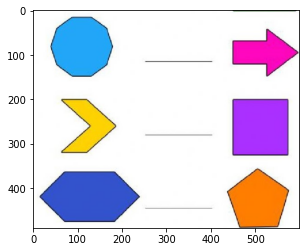

In [4]:
img=io.imread('../images/shapes.jpg')
plt.imshow(img)

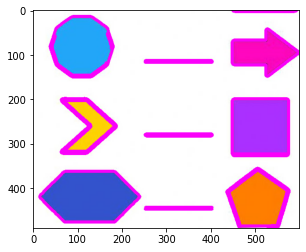

In [5]:
draw_contour_outline(img,color=(250,0,250),thickness=6)

In [6]:
fruit=io.imread('../images/many fruits.png')
plt.imshow(fruit)

FileNotFoundError: No such file: 'C:\Users\arize\3D Objects\JUPYTER_NOTEBOOK\DEEP_LEARNING\CONTOURS\images\many fruits.png'

In [ ]:
def banana_contour_outline(img,color=(250,0,250) ,thickness=1,mode=cv2.RETR_TREE):
    if len(img.shape)>2.0:
        img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    else:
        img1=img
    ret,binary_img=cv2.threshold(img1,240,255,cv2.THRESH_BINARY_INV)
    #binary_img=~binary_img
    contours,hierarchy=cv2.findContours(binary_img,mode,cv2.CHAIN_APPROX_NONE)
    #blurr=cv2.GaussianBlur(img1,ksize=(5,5),sigmaX=2)
    #edge=cv2.Canny(blurr,80,150,L2gradient=True)
    #contours,hierarchy=cv2.findContours(edge,mode,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        out=cv2.drawContours(img,[cnt],-1,color,thickness)
    return plt.imshow(out)

In [ ]:
banana_contour_outline(fruit,thickness=12,color=(250,0,250), mode=cv2.RETR_TREE) 

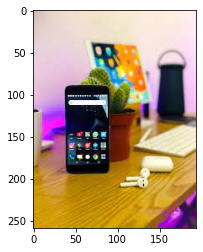

In [7]:
phone=io.imread('../images/phone.jpg')
phone1=phone.copy()
plt.imshow(phone)

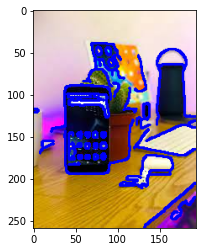

In [8]:
draw_contour_outline(phone,color=(0,0,250),thickness=2,mode=cv2.RETR_LIST)

#  Bounding Boxes

In object detection, a bounding box is usually used to describe the spatial location of an object. The bounding box is rectangular, which is determined using the upper left corner pixel  coordinates $(x_{min},y_{min})$ and the lower right corner pixel with coordinates $(x_{max},y_{max})$ 



**2 main conventions followed when representing bounding boxes**

- Specify the box with respect to the coordinates of its top left, and the bottom right point.

- Specify the box with respect to its center, and its width and height.



In [9]:
def draw_bounding_box(img,color=(250,0,0),mode=cv2.RETR_TREE ,thickness=6):
    if len(img.shape)>2.0:
        img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    else:
        img1=img
    #ret,binary_im=cv2.threshold(img1,90,150,cv2.THRESH_BINARY)
    #contours,hierarchy=cv2.findContours(binary_im,mode,cv2.CHAIN_APPROX_NONE)
    blurr=cv2.GaussianBlur(img1,ksize=(5,5),sigmaX=2)
    edge=cv2.Canny(blurr,80,150,L2gradient=True)
    contours,hierarchy=cv2.findContours(edge,mode,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        x,y,w,h=cv2.boundingRect(cnt)
        out=cv2.rectangle(img,(x,y),(w+x,h+y),color,thickness)
    return plt.imshow(out)

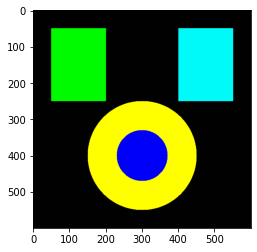

In [10]:
def sample_image():
    img = np.ones((600,600, 3), dtype="uint8") #* 70
    cv2.rectangle(img, (50, 50), (200, 250), (0, 250, 0), -1)
    cv2.rectangle(img, (400, 50), (550, 250), (0, 250, 250), -1)
    cv2.circle(img, (300, 400), 150, (255, 255, 0), -1)
    cv2.circle(img, (300, 400), 70, (0, 0, 250), -1) 
    return img
img=sample_image()
img1=img.copy()
plt.imshow(img)

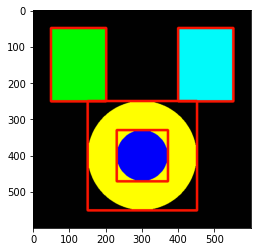

In [11]:
draw_bounding_box(img1,color=(250,20,0))

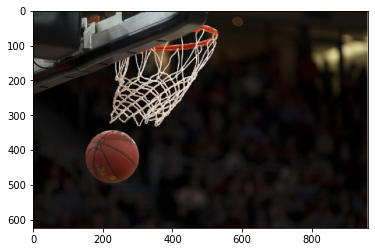

In [12]:
b_ball=io.imread('../images/basketball.jpg')
plt.imshow(b_ball)

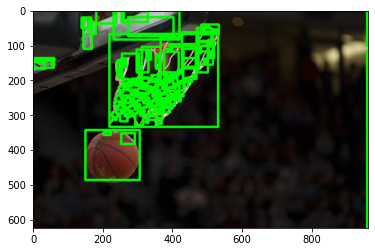

In [13]:
draw_bounding_box(b_ball,color=(0,250,0))

**Aspect Ratio**

It is the ratio of width to height of bounding box of the object.
$$𝐴𝑠𝑝𝑒𝑐𝑡  \ 𝑅𝑎𝑡𝑖𝑜 =\frac{ 𝑊𝑖𝑑𝑡ℎ}{𝐻𝑒𝑖𝑔ℎ𝑡}$$

In [14]:
img=sample_image() 
img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
ret,binary_img=cv2.threshold(img1,240,255,cv2.THRESH_BINARY_INV)
contours,hierarchy=cv2.findContours(binary_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt=contours[0]
x,y,w,h=cv2.boundingRect(cnt)
print('aspect ratio ;'+str(w/h))

aspect ratio ;1.0


**Extent**

Extent is the ratio of contour area to bounding box area.

$$𝐸𝑥𝑡𝑒𝑛𝑡 = \frac{𝑂𝑏𝑗𝑒𝑐𝑡 \ 𝐴𝑟𝑒𝑎}{𝐵𝑜𝑢𝑛𝑑𝑖𝑛𝑔 \ box \ 𝐴𝑟𝑒𝑎}$$

In [15]:
object_area=cv2.contourArea(cnt)
x,y,w,h=cv2.boundingRect(cnt)
b_box_area=w*h
print('extent ;'+str(object_area/b_box_area))

extent ;0.9966694444444445


In [16]:
hierarchy

array([[[-1, -1, -1, -1]]], dtype=int32)

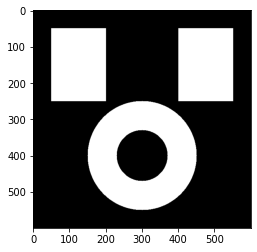

In [17]:
img1=sample_image()
img2=img1.copy()
gray_img=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
ret,binary_img=cv2.threshold(gray_img,90,150,cv2.THRESH_BINARY)
contours,hierarchy=cv2.findContours(binary_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
plt.imshow(binary_img)

# Contour Perimeter
It is also called arc length. It can be found out using cv2.arcLength() function. Second argument specify whether
shape is a closed contour (if passed True), or just a curve


In [18]:
arc=cv2.arcLength(cnt,True)
arc

2396.0

# Image moments

In image processing, computer vision and related fields, an image moment can be seen as a weighted average of image pixel intensities. This help us to calculate some features like center of mass of the object, area of the object etc

In [19]:
M=cv2.moments(cnt)
print(M)

{'m00': 358801.0, 'm10': 107460899.5, 'm01': 107460899.5, 'm20': 42912719200.33333, 'm11': 32184539400.25, 'm02': 42912719200.33333, 'm30': 19278539100749.75, 'm21': 12852359400499.834, 'm12': 12852359400499.834, 'm03': 19278539100749.75, 'mu20': 10728179800.083328, 'mu11': 0.0, 'mu02': 10728179800.083328, 'mu30': 0.00390625, 'mu21': 0.001953125, 'mu12': 0.001953125, 'mu03': 0.00390625, 'nu20': 0.0833333333333333, 'nu11': 0.0, 'nu02': 0.0833333333333333, 'nu30': 5.065542025235829e-17, 'nu21': 2.5327710126179146e-17, 'nu12': 2.5327710126179146e-17, 'nu03': 5.065542025235829e-17}


# contour AREA
Contour area is given by the function cv2.contourArea() or from moments, M[’m00’]


In [22]:
area=cv2.contourArea(cnt)
area,M['m00']

(358801.0, 358801.0)

#centroid  
From this moments, you can extract useful data like area, centroid etc. The centroid of a shape is the arithmetic mean  of all the points in a shape. Each shape in  an image is made of pixels, and the centroid is the weighted average of all the pixels constituting the shape Centroid is given by the relations, $𝐶_𝑥 = \frac{𝑀_{10}}{ 𝑀_{0 0}}$ and $𝐶_y = \frac{𝑀_{01}}{ 𝑀_{0 0}}$ . This can be done as follows:


In [23]:
cx=round(M['m10']/M['m00'])
cy=round(M['m01']/M['m00'])
cx,cy

(300, 300)

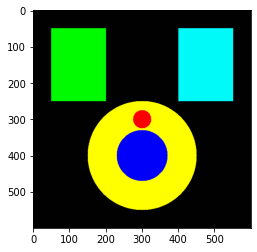

In [24]:
centroid=cv2.circle(img1,(cx,cy),25,(250,0,0),-1)
plt.imshow(centroid)

In [25]:
img2=img.copy()


since we have multiply blob (a group of connected pixels in an image that shares some common property) we define a function  **draw_image_centroid** to draw a red circle at the location of each object in the image.


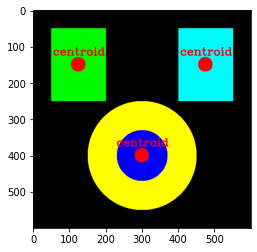

In [26]:
def draw_image_centroid(img,mode=cv2.RETR_TREE):
    if len(img.shape)>2.0:
        img1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    else:
        img1=img
    #ret,thresh=cv2.threshold(img1,60,180,cv2.THRESH_BINARY)
    blurr=cv2.GaussianBlur(img1,ksize=(5,5),sigmaX=2)
    edge=cv2.Canny(blurr,80,150,L2gradient=True)

    contours,hierarchy=cv2.findContours(edge,mode,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        M=cv2.moments(cnt)
        if M['m00'] !=0:
            cx=int(M['m10']/M['m00'])
            cy=int(M['m01']/M['m00'])
        else:
            cy,cx=0,0
        out=cv2.circle(img,(cx,cy),20,(250,0,0),-1)
        out= cv2.putText(out, "centroid", (cx - 70, cy - 25),cv2.FONT_HERSHEY_COMPLEX, 1, (250, 0, 0), 2)
    return  plt.imshow(out)
img2=img.copy()
draw_image_centroid(img2)

Roundness κ is the measure of how closely a contour approaches the contour of a perfect
circle. 

$$ k=\frac{P^{2}}{A*4*\pi}$$

where P is the perimeter of the contour and A is the corresponding area. In the case of a perfect
circle, the result will be 1

In [27]:
def roundness(contour):
    A=cv2.contourArea(contour)
    P=cv2.arcLength(contour,True)
    output=P**2/(A*4*np.pi)
    return output

In [28]:
roundness_first_contour=roundness(contours[0])
roundness_first_contour


1.11868410568218

- [Computer Vision and Image Processing: Fundamentals and Applications 1st Edition: 2.2.1 Discrete fourier transform](https://www.amazon.com/Computer-Vision-Image-Processing-Fundamentals/dp/0815370849)

- [Wikipedia](https://en.wikipedia.org/wiki/Image_moment)
